# Text classification with classifier algorithms in Scikit-learn along Boosting Classifiers for Imbalanced data and Balanced Data.

### Project Overview: Emotion Classification with Balanced Dataset
This project aims to identify the best model for classifying emotions from text data in a balanced dataset. Here's a breakdown:

## 1. Data Preparation:

Text data (emotion_df['text']) and corresponding labels (emotion_df['label']) are loaded.
## 2. Oversampling (if applicable):

Techniques like SMOTE might be employed to address class imbalance, creating a balanced dataset for training traditional classifiers.
## 3. Model Selection with GridSearchCV:

A predefined dictionary (classifiers) contains various classifiers (Decision Tree, SVM, KNN, LightGBM, Logistic Regression, XGBoost).
A hyperparameter grid (param_grid) specifies tuning options for each classifier.
GridSearchCV is used to find the best model based on accuracy (or other metrics) within each classifier category.
This ensures we select the best hyperparameter configuration for each model type.

## 4. Evaluation on Validation Data:

The best model identified by GridSearchCV is used to make predictions on the validation dataset (X_val, y_val).
Validation accuracy is calculated using accuracy_score to assess the model's generalization ability.
A confusion matrix is generated to provide detailed insights into the model's performance on each emotion class.
## 5. Output:

The project reports the best model name, its validation accuracy, and the confusion matrix.
## Benefits:

GridSearchCV automates hyperparameter tuning, saving time and effort.
Evaluation on a balanced dataset ensures a fairer comparison of models.
Confusion matrix provides valuable insights into class-wise performance.
## Next Steps:

Explore advanced hyperparameter optimization techniques (Bayesian Optimization, Random Search) for further refinement.
Consider fine-tuning Transformers like BERT or RoBERTa for potentially higher performance.
## Target Audience:

Machine learning practitioners interested in emotion classification.
Researchers working on text analysis and sentiment analysis.
   

In [1]:
####    Required packages for model importing     ####
####    Uncomment if this packages are not available in the system.   ####

    #!pip install xgboost
    #!pip install imblearn
    #!pip install lightgbm
    #!pip install --upgrade threadpoolctl
    #!pip install --upgrade imbalanced-learn
     #!pip install -U scikit-learn
     #!pip install --upgrade scikit-learn

####   Under this comment this are the pacakages need for BERT And Roberta models.   #### 
####   Uncomment this packages if it is the desired approach.   ####

    ##!pip install transformers
    ##!pip install pytorch
    ##!pip install tf-keras

In [2]:
# # Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import nltk

# necessary imports  for text preprocessing
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import string
import unicodedata

# For spliting data sets  and evalution reports imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from collections import Counter

# for text representation using feature engginering 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Different Classifier imports 
# from scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV  

# transformer classifiers
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#### if going for BERT and Roberta based Models 
   #from transformers import BertTokenizer, BertModel
   #from transformers import TFBertForSequenceClassification
   #from transformers import RobertaTokenizer, RobertaModel
   #from transformers import TFRobertaForSequenceClassification


from string import punctuation
from nltk import pos_tag
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings





In [3]:
# fetching  the dataset and labels 
emotion_df = pd.read_csv(r"C:\Users\siban\Text Ananlysis\Emotions_training.csv",encoding='latin-1')
emotion_labels = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}

 ### Data Overview and Related task 

In [4]:
emotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [5]:
emotion_df['label'].unique() 

array([0, 3, 2, 5, 4, 1], dtype=int64)

In [6]:
emotion_df.isnull().sum()

text     0
label    0
dtype: int64

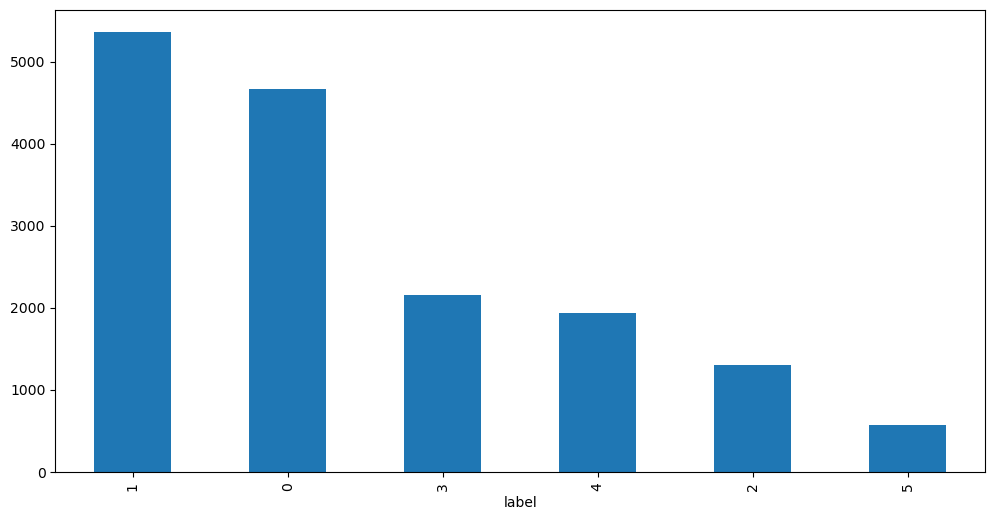

In [7]:
plt.figure(figsize=(12,6))
emotion_df.label.value_counts().plot(kind='bar');

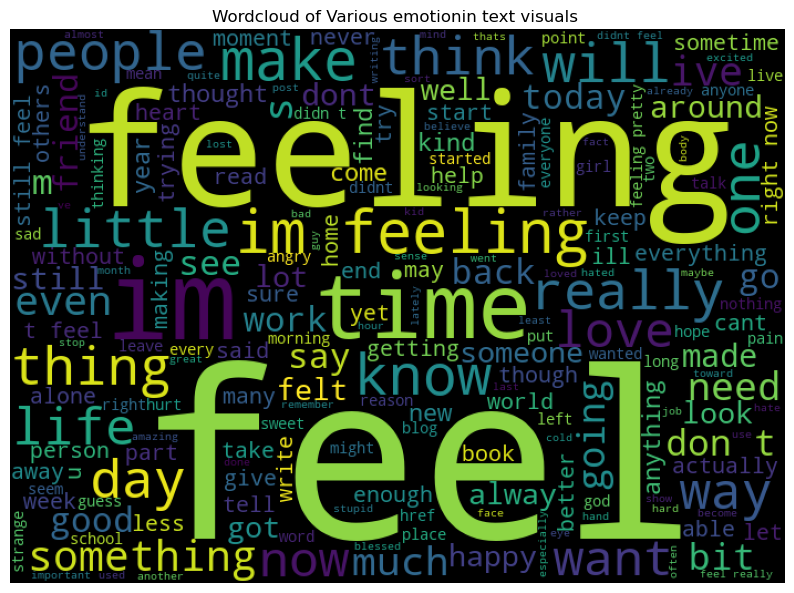

In [8]:
## Data preprocessing on text
wordcloud = WordCloud(width=700, height=500, background_color="black")

wordcloud.generate(" ".join(emotion_df['text']))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Wordcloud of Various emotionin text visuals ")
plt.show()


### Text preprocessing of text column of Emotions data set 


In [9]:
# converting to lower case 
emotion_df['text']=emotion_df['text'].str.lower() 
# Using stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.remove("not") 
stop_words=set(stop_words)

### Cleaning of text usning pipeline with functions to clean the textual data


In [10]:
# Removal existing html tags
def remove_html_tags(text): 
    pattern=re.compile('<.*?>')
    return pattern.sub(r'',text)

# Removal punctuations
def remove_special_character(content): 
    return re.sub(r'[^a-zA-Z ]',' ', content )

#Removal of URLs
def remove_url(content): 
    return re.sub(r'http\S+', '', content)

# Remove of stop words from content part of text column 
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

In [11]:
# For the expansions of  some certain contract usage in text column 
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    return content

### Data Cleaning workplace to cleane the data

In [12]:
def data_cleaning(content):
    if not pd.isna(content):  
        content = remove_html_tags(content)
        content = remove_url(content)
        content = remove_special_character(content)
        content = contraction_expansion(content)
        content = remove_stopwords(content)
    return content

In [13]:
emotion_df['text']=emotion_df['text'].apply(data_cleaning)

In [14]:
# using Lemmatization on cleaned data 
# Lemmatization from nltk package
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
emotion_df['text'] = emotion_df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [15]:
# checking after implementing lemmatization 
emotion_df['text'][700]

'think feel passionate favorite workout gear love seeing people love need live without hoping share favorite comment'

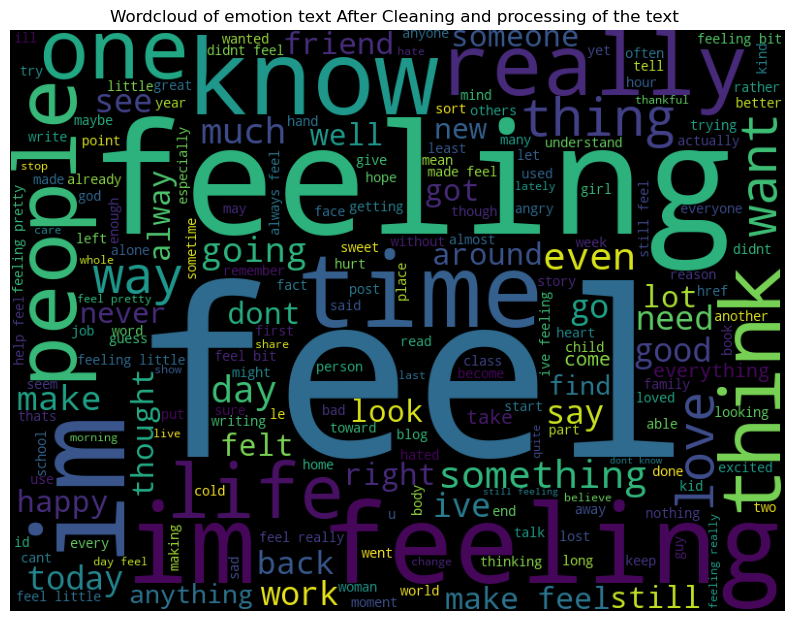

In [16]:
#visualization of content through world cloud 
wordcloud = WordCloud(width=800, height=600, background_color="black")
wordcloud.generate(" ".join(emotion_df['text']))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Wordcloud of emotion text After Cleaning and processing of the text ")
plt.show()


### Dataset After performing Text preprocessing

In [17]:
emotion_df

,text,label
0,didnt feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,im grabbing minute post feel greedy wrong,3
3,ever feeling nostalgic fireplace know still pr...,2
4,feeling grouchy,3
...,...,...
15995,brief time beanbag said anna feel like beaten,0
15996,turning feel pathetic still waiting table subb...,0
15997,feel strong good overall,1
15998,feel like rude comment im glad,3


### Taking the  multi class immbalance of the dataset 

In [18]:
class_counts = emotion_df['label'].value_counts()
majority_class = class_counts.idxmax()  

# Function for oversample a class
def oversample_class(data_subset, target_count):
    oversampled_data = data_subset.sample(replace=True, n=target_count - len(data_subset))
    return pd.concat([data_subset, oversampled_data])

# Oversample minority classes
oversampled_data = []
for label, count in class_counts.items():
    if label != majority_class: 
        data_subset = emotion_df[emotion_df['label'] == label]  
        oversampled_subset = oversample_class(data_subset, class_counts[majority_class])  
        oversampled_data.append(oversampled_subset)
    else:
        oversampled_data.append(emotion_df[emotion_df['label'] == label])  
# Combine the oversampled data
oversampled_df = pd.concat(oversampled_data)

# Extracting text and labels from oversampled data
oversampled_text = oversampled_df['text']
oversampled_labels = oversampled_df['label']



<Axes: xlabel='label'>

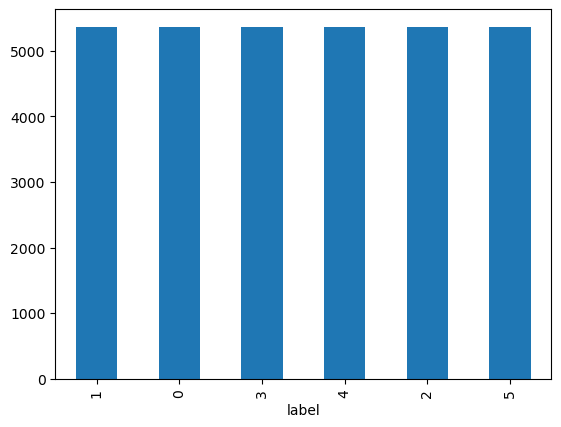

In [19]:
#visualization of the oversampled data by bar chart
oversampled_labels.value_counts().plot(kind="bar")

### Feature Engginearing and partion of traning and testing data and valaidation data 


In [20]:
# Division of data sets 
y = emotion_df['label']  
X  = emotion_df['text']

# text Represntation by using Vectorization suggested by the mentor 
vectorizer = TfidfVectorizer(max_features=2000)  
features_oversampled = vectorizer.fit_transform(oversampled_text)

vectorizer = TfidfVectorizer(max_features=2000)  
X_imb_vec = vectorizer.fit_transform(X)

## Split the dataset into train, test, and validation sets 

In [21]:
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imb_vec, y, test_size=0.3, random_state=42,stratify=y)

In [22]:
####  if any environment issuses faced by the system while performing the BERT and Robert Model then Uncomment this and run this .####

#!pip uninstall scikit-learn --yes
#!pip uninstall imblearn --yes
#!pip install scikit-learn==1.2.2
#!pip install imblearn

###  Modeling Approach for Imbalanced Dataset
This code cell addresses the class imbalance present in the emotion dataset.
## 1 .Oversampling
Techniques like SMOTE (Synthetic Minority Oversampling Technique) can be used to create synthetic data points for the minority class(es). This helps create a more balanced dataset for training traditional machine learning classifiers.
## 2. Data Splitting for Training, Validation, and Testing 
This section splits the prepared dataset into training, validation, and (if applicable) testing sets. This is crucial for:

# Training: 
The model learns from the training data.
# Validation:
We evaluate the model's performance and hyperparameter tuning on the validation data to prevent overfitting.
# Testing (optional):
If available, the final model performance is assessed on unseen data from the test set.
Common split ratios are 80/20 (training/validation) or 60/20/20 (training/validation/testing). You can adjust these ratios based on your dataset size and project requirements.

## 3. Model Selection:

Use techniques like GridSearchCV to find the best model and its hyperparameters within chosen classifiers (e.g., Decision Tree, SVM, KNN).
Ensure the chosen models are suitable for imbalanced data or can be adapted using cost-sensitive learning.
This approach aims to mitigate the impact of class imbalance and improve the model's ability to classify emotions accurately across all classes.

## 4. Reports for checking the best model.
# Confusion Matrix:
A table that visualizes the performance of a classification model on a set of data.
# Validation Report:
An evaluation summary of a model's performance on a hold-out validation dataset.



In [23]:
# Handling imbalance by using the SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_im, y_im = smote.fit_resample(X_imb_vec, y)
num_classes = len(set(y_im))

In [24]:
X_train_im, X_test_im, y_train_im, y_test_im = train_test_split(X_im, y_im, test_size=0.3, random_state=42,stratify=y_im)

In [25]:

classifiers_for_imb = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(objective='multi:softprob', random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'LightGBM': LGBMClassifier(objective='multiclass', num_class=num_classes, random_state=42),
}
    #'BERT': TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes),
    #'RoBERTa': TFRobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=num_classes)






In [26]:
param_grid_for_imb = {
    'DecisionTree': {'max_depth': [3, 5, 8, 10, 20, 30]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'SVM': {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf', 'linear']},
    'KNN': {'n_neighbors': [3, 5, 7, 9]},
    'LightGBM': {'learning_rate': [0.01, 0.1, 1]},
    
    #'BERT': {'learning_rate': [5e-5, 3e-5, 2e-5], 'epsilon': [1e-8, 1e-7, 1e-6]},
    #'RoBERTa': {'learning_rate': [5e-5, 3e-5, 2e-5], 'epsilon': [1e-8, 1e-7, 1e-6]}
}

In [27]:
scores_imb = []  # holds the each scoring of classifier at iterations
best_estimators_imb = {}  # set of all the best selected classifiers with best param

for model_name, model in classifiers_for_imb.items():
    clf = GridSearchCV(model, param_grid_for_imb[model_name], scoring='accuracy', cv=5)
    clf.fit(X_train_imb, y_train_imb)  
    scores_imb.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators_imb[model_name] = clf.best_estimator_

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17241
[LightGBM] [Info] Number of data points in the train set: 8960, number of used features: 791
[LightGBM] [Info] Start training from score -1.232271
[LightGBM] [Info] Start training from score -1.093158
[LightGBM] [Info] Start training from score -2.506112
[LightGBM] [Info] Start training from score -2.002977
[LightGBM] [Info] Start training from score -2.112112
[LightGBM] [Info] Start training from score -3.332205
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17080
[LightGBM] [Info] Number of data points in the train set: 896

In [50]:
# Finding the best model and its accuracy 
best_model_name = max(scores_imb, key=lambda x: x['best_score'])['model']
best_model_score = max(scores_imb, key=lambda x: x['best_score'])['best_score']
print(f"Best Model: {best_model_name} with Score: {best_model_score}")

# We can now use the best_estimators_imb[best_model_name] for prediction on your test data
y_pred = best_estimators_imb[best_model_name].predict(X_test_imb)
test_accuracy = accuracy_score(y_test_imb, y_pred)
print(f"Test Accuracy of Best Model: {test_accuracy}")

Best Model: XGBoost with Score: 0.8802678571428573
Test Accuracy of Best Model: 0.8845833333333334


In [51]:
# Comparison of all the models used .
output_df_imb=pd.DataFrame(scores_imb,columns=['model','best_score','best_params'])
output_df_imb.sort_values(by="best_score",ascending=False)

,model,best_score,best_params
1,XGBoost,0.880268,"{'learning_rate': 1, 'n_estimators': 100}"
2,SVM,0.872411,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}"
4,LightGBM,0.825714,{'learning_rate': 0.1}
3,KNN,0.759554,{'n_neighbors': 9}
0,DecisionTree,0.426875,{'max_depth': 30}


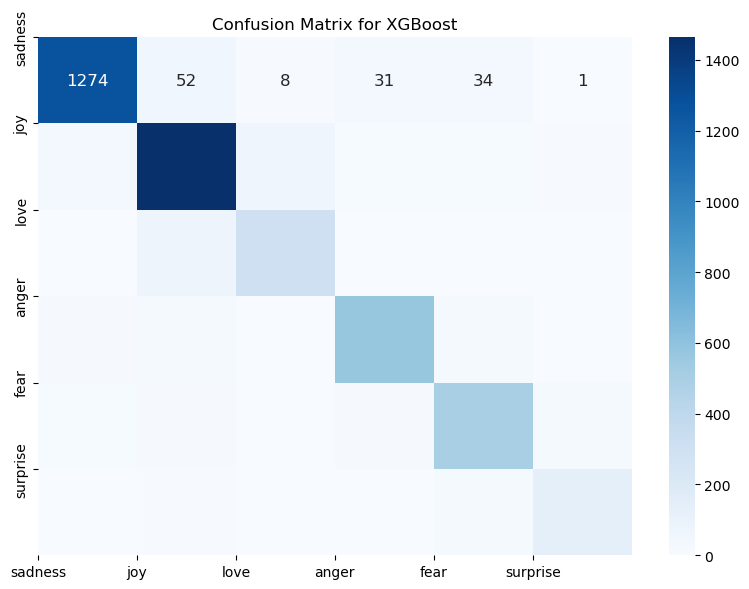

[[1274   52    8   31   34    1]
 [  31 1464   74   15   15    9]
 [   0   79  305    4    3    0]
 [  21   26    4  572   24    1]
 [  17   19    1   22  499   23]
 [   2   11    1    0   26  132]]


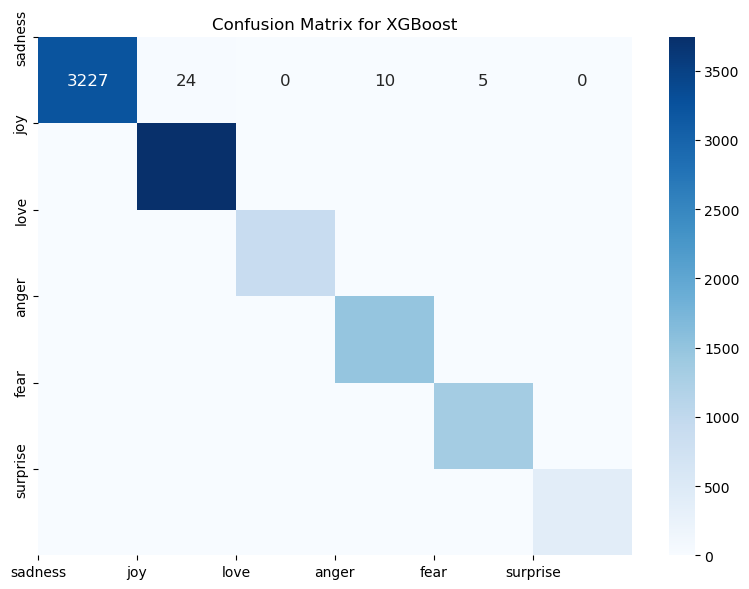

[[3227   24    0   10    5    0]
 [   0 3742    6    5    0    1]
 [   0    8  905    0    0    0]
 [   7   12    0 1490    2    0]
 [   1    4    0    7 1339    5]
 [   0    1    0    0    2  397]]


In [58]:
# Function to visualize confusion matrix for a model
def plot_confusion_matrix(model_name, clf, X, y, emotion_labels, colormap='Blues'):
    

    cm = confusion_matrix(y, clf.predict(X))

    plt.figure(figsize=(8, 6))  # Increased figure size for better readability
    ax = plt.axes()
    ax.set_title(f"Confusion Matrix for {model_name}")
    ax.set_xlabel('Predicted (' + ', '.join(emotion_labels.values()) + ')')
    ax.set_ylabel('True (' + ', '.join(emotion_labels.values()) + ')')

    # Use seaborn for heatmap visualization with adjusted colormap and font size
    sn.heatmap(cm, annot=True, fmt='g', cmap=colormap, annot_kws={'fontsize': 12})

    plt.xticks(range(len(emotion_labels)), emotion_labels.values())
    plt.yticks(range(len(emotion_labels)), emotion_labels.values())
    plt.grid(False)  # Remove grid lines for cleaner visualization
    plt.tight_layout()  # Adjust layout to prevent overlapping elements
    plt.show()
    print(cm)

# Assuming you have best_model_name set to 'XGBoost' (modify if different)
best_model = best_estimators_imb[best_model_name]

# Confusion matrix for test data
plot_confusion_matrix(best_model_name, best_model, X_test_imb, y_test_imb, emotion_labels)


# Confusion matrix for training data
plot_confusion_matrix(best_model_name, best_model, X_train_imb, y_train_imb, emotion_labels)



In [31]:
### Reapplying some methods to get the validation report of the best model .
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming your emotion dataset is stored in pandas DataFrames
emotion_df_text = emotion_df['text']  # Text data
emotion_df_label = emotion_df['label']  # Labels

# Perform text vectorization (if not already done)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)  # Adjust max_features as needed
X_vec = vectorizer.fit_transform(emotion_df_text)

# Apply SMOTE for oversampling (assuming imbalanced classes)
smote = SMOTE(random_state=42)
X_im, y_im = smote.fit_resample(X_vec, emotion_df_label)  # Oversample features and labels

# Split the oversampled data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_im, y_im, test_size=0.2, random_state=42)

# Further split training data into training and validation sets (optional)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [32]:
#### after the sorting of the data set into validation data set for the report generation .
model = best_estimators_imb["XGBoost"]  

y_pred_val = model.predict(X_val)  # Predict using validation data features

# Calculate validation accuracy
validation_accuracy = accuracy_score(y_val, y_pred_val)

# Generate a more comprehensive validation report 
validation_report = classification_report(y_val, y_pred_val)

print(f"Validation Accuracy of Best Model: {validation_accuracy}")

# Print classification report (optional)
print(validation_report)

Validation Accuracy of Best Model: 0.9127816627816627
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       855
           1       0.79      0.96      0.87       844
           2       0.97      0.88      0.92       837
           3       0.96      0.90      0.93       837
           4       0.88      0.89      0.89       865
           5       0.98      0.88      0.93       910

    accuracy                           0.91      5148
   macro avg       0.92      0.91      0.91      5148
weighted avg       0.92      0.91      0.91      5148



In [33]:
## classification report of XGBoost Classifier the best model after evaluation.
clf_report=classification_report(y_test_imb,best_estimators_imb["XGBoost"].predict(X_test_imb))
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1400
           1       0.89      0.91      0.90      1608
           2       0.78      0.78      0.78       391
           3       0.89      0.88      0.89       648
           4       0.83      0.86      0.84       581
           5       0.80      0.77      0.78       172

    accuracy                           0.88      4800
   macro avg       0.85      0.85      0.85      4800
weighted avg       0.89      0.88      0.88      4800



### For Balanced Dataset 
Using the same  models as of Imbalanced Dataset with an Addition of the Logistic Regrssion .

In [34]:
classifiers = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(class_weight='balanced', random_state=42), 
    'KNN': KNeighborsClassifier(n_neighbors=5),  
    'LightGBM': LGBMClassifier(objective='multiclass', num_class=len(class_counts), random_state=42),
    'LogisticRegression': LogisticRegression(solver='liblinear', multi_class='auto', random_state=42),
    'XGBoost': XGBClassifier(objective='multi:softprob', random_state=42)  
     #'BERT': TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes),
    #'RoBERTa': TFRobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=num_classes)

}

In [35]:
param_grid = {
    'DecisionTree': {'max_depth': [3, 5, 8,10,20,30]},
    'SVM': {'C': [0.1, 1, 10]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'LightGBM': {'learning_rate': [0.01, 0.1, 1]},  
    'LogisticRegression': {'C': [0.01, 0.1, 1, 10]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]} 

    #'BERT': {'learning_rate': [5e-5, 3e-5, 2e-5], 'epsilon': [1e-8, 1e-7, 1e-6]},
    #'RoBERTa': {'learning_rate': [5e-5, 3e-5, 2e-5], 'epsilon': [1e-8, 1e-7, 1e-6]}
}


In [37]:
scores = []  # List to store model evaluation results
best_estimators = {}  # Dictionary to store best models for each classifier

for model_name, model in classifiers.items():
  # Create a GridSearchCV object for each classifier with its hyperparameter grid
  clf = GridSearchCV(model, param_grid[model_name], scoring='accuracy', cv=5)

  # Fit the GridSearchCV object to the training and validation data (assuming balanced data)
  clf.fit(X_train_val, y_train_val)

  # Store evaluation results
  scores.append({
      'model': model_name,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
  })

  # Store the best model for each classifier
  best_estimators[model_name] = clf.best_estimator_

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.232094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47107
[LightGBM] [Info] Number of data points in the train set: 20589, number of used features: 1449
[LightGBM] [Info] Start training from score -1.795116
[LightGBM] [Info] Start training from score -1.793072
[LightGBM] [Info] Start training from score -1.788704
[LightGBM] [Info] Start training from score -1.788123
[LightGBM] [Info] Start training from score -1.793655
[LightGBM] [Info] Start training from score -1.791905
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.132483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 46813
[LightGBM] [Info] Number of data points in the train set: 20589, number of used features: 1425
[LightGBM] [Info] Start trai


KeyboardInterrupt



In [61]:
# Print evaluation results
print("Model Selection Results:")
for score in scores:
  print(f"\tModel: {score['model']}, Best Score: {score['best_score']}, Best Parameters: {score['best_params']}")

# Access the best model (assuming you want the classifier with the highest score)
best_model_name = max(scores, key=lambda x: x['best_score'])['model']
best_model = best_estimators[best_model_name]

print(f"\nBest Model: {best_model_name}")

Model Selection Results:
	Model: DecisionTree, Best Score: 0.4590666495173975, Best Parameters: {'max_depth': 30}
	Model: SVM, Best Score: 0.9498386972352388, Best Parameters: {'C': 10}
	Model: KNN, Best Score: 0.7439096242573997, Best Parameters: {'n_neighbors': 3}
	Model: LightGBM, Best Score: 0.9317326770114802, Best Parameters: {'learning_rate': 0.1}
	Model: LogisticRegression, Best Score: 0.9410187194236155, Best Parameters: {'C': 10}

Best Model: SVM


In [62]:
output_df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
output_df.sort_values(by="best_score",ascending=False)

,model,best_score,best_params
1,SVM,0.949839,{'C': 10}
4,LogisticRegression,0.941019,{'C': 10}
3,LightGBM,0.931733,{'learning_rate': 0.1}
2,KNN,0.743910,{'n_neighbors': 3}
0,DecisionTree,0.459067,{'max_depth': 30}


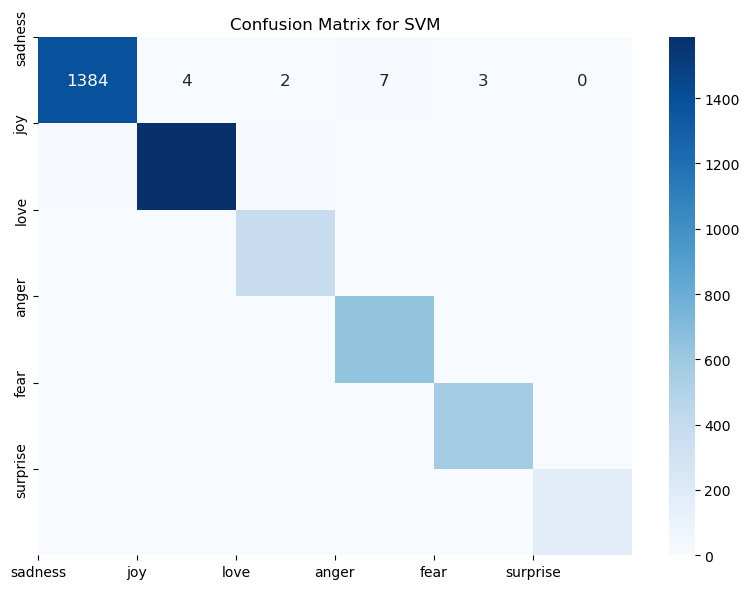

[[1384    4    2    7    3    0]
 [   7 1587   10    2    1    1]
 [   1    6  383    1    0    0]
 [   5    3    0  639    1    0]
 [   0    5    0    3  571    2]
 [   0    0    0    0    0  172]]


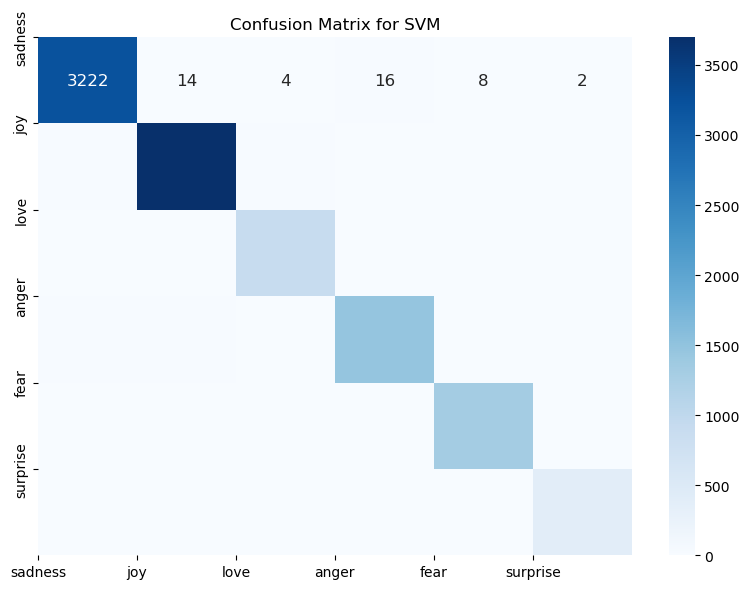

[[3222   14    4   16    8    2]
 [  20 3699   26    3    2    4]
 [   3   10  900    0    0    0]
 [  16   19    0 1473    3    0]
 [  11   12    0    5 1320    8]
 [   1    0    0    0    1  398]]


In [63]:
best_model = best_estimators[best_model_name]

# Confusion matrix for test data
plot_confusion_matrix(best_model_name, best_model, X_test_imb, y_test_imb, emotion_labels)

# Confusion matrix for training data
plot_confusion_matrix(best_model_name, best_model, X_train_imb, y_train_imb, emotion_labels)

In [43]:
model = best_estimators["SVM"]  

y_pred_val = model.predict(X_val)  # Predict using validation data features

# Calculate validation accuracy
validation_accuracy = accuracy_score(y_val, y_pred_val)

# Generate a more comprehensive validation report 
validation_report = classification_report(y_val, y_pred_val)

print(f"Validation Accuracy of Best Model: {validation_accuracy}")

# Print classification report (optional)
print(validation_report)

Validation Accuracy of Best Model: 0.9961149961149961
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       855
           1       1.00      1.00      1.00       844
           2       1.00      1.00      1.00       837
           3       0.99      1.00      0.99       837
           4       1.00      0.99      0.99       865
           5       0.99      1.00      1.00       910

    accuracy                           1.00      5148
   macro avg       1.00      1.00      1.00      5148
weighted avg       1.00      1.00      1.00      5148



In [44]:
## classification report of XGBoost Classifier the best model after evaluation.
clf_report=classification_report(y_test_imb,best_estimators["SVM"].predict(X_test_imb))
print(clf_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1400
           1       0.99      0.99      0.99      1608
           2       0.97      0.98      0.97       391
           3       0.98      0.99      0.98       648
           4       0.99      0.98      0.99       581
           5       0.98      1.00      0.99       172

    accuracy                           0.99      4800
   macro avg       0.98      0.99      0.99      4800
weighted avg       0.99      0.99      0.99      4800



# Conclusion 
## In Imbalance data the best model is XGBoost model works well .

In [45]:
best_model_name = max(scores_imb, key=lambda x: x['best_score'])['model']
best_model_score = max(scores_imb, key=lambda x: x['best_score'])['best_score']
print(f"Best Model: {best_model_name} with Score: {best_model_score}")

# We can now use the best_estimators_imb[best_model_name] for prediction on your test data
y_pred = best_estimators_imb[best_model_name].predict(X_test_imb)
test_accuracy = accuracy_score(y_test_imb, y_pred)
print(f"Test Accuracy of Best Model: {test_accuracy}")       

Best Model: XGBoost with Score: 0.8802678571428573
Test Accuracy of Best Model: 0.8845833333333334


## In balance data the best model is SVM model that works well.

In [46]:
print("Model Selection Results:")
for score in scores:
  print(f"\tModel: {score['model']}, Best Score: {score['best_score']}, Best Parameters: {score['best_params']}")

# Access the best model (assuming you want the classifier with the highest score)
best_model_name = max(scores, key=lambda x: x['best_score'])['model']
best_model = best_estimators[best_model_name]

print(f"\nBest Model: {best_model_name}")

Model Selection Results:
	Model: DecisionTree, Best Score: 0.4590666495173975, Best Parameters: {'max_depth': 30}
	Model: SVM, Best Score: 0.9498386972352388, Best Parameters: {'C': 10}
	Model: KNN, Best Score: 0.7439096242573997, Best Parameters: {'n_neighbors': 3}
	Model: LightGBM, Best Score: 0.9317326770114802, Best Parameters: {'learning_rate': 0.1}
	Model: LogisticRegression, Best Score: 0.9410187194236155, Best Parameters: {'C': 10}

Best Model: SVM


##### Thank YOU .